<a href="https://colab.research.google.com/github/sumiyaanika/DL/blob/main/assignmentDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode labels
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 153ms/step - accuracy: 0.3192 - loss: 1.9736 - val_accuracy: 0.4811 - val_loss: 1.4356
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 141s 153ms/step - accuracy: 0.4820 - loss: 1.4472 - val_accuracy: 0.4775 - val_loss: 1.5940
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 153ms/step - accuracy: 0.5410 - loss: 1.2947 - val_accuracy: 0.5376 - val_loss: 1.3422
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 140s 151ms/step - accuracy: 0.5775 - loss: 1.1974 - val_accuracy: 0.6351 - val_loss: 1.0516
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 154ms/step - accuracy: 0.6092 - loss: 1.1163 - val_accuracy: 0.5272 - val_loss: 1.3173
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 117s 149ms/step - accuracy: 0.6317 - loss: 1.0609 - val_accuracy: 0.6237 - val_loss: 1.0758
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 150ms/step - accuracy: 0.6505 - loss: 1.0111 - val_accuracy: 0.6834 - val_loss: 0.9319
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 151ms/step - accuracy: 0.6624 - loss: 0.97

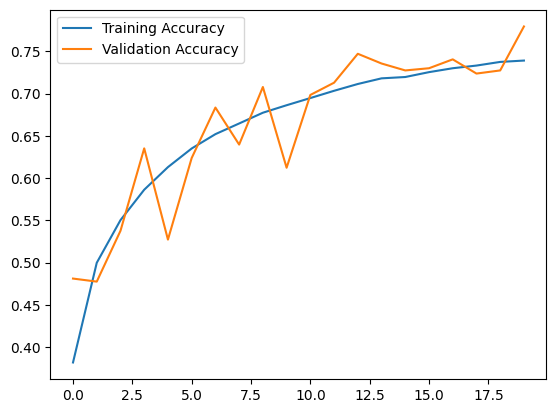

In [5]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    validation_data=(x_test, y_test),
                    epochs=20)
# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


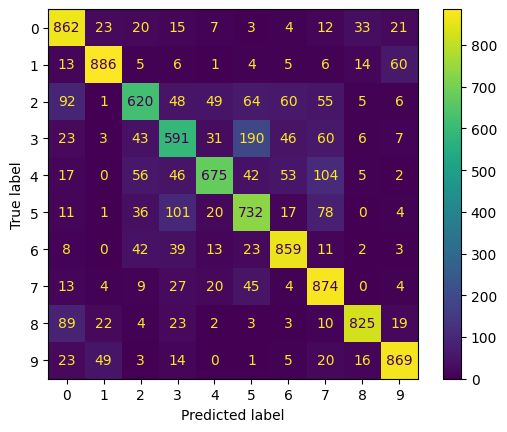

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
ConfusionMatrixDisplay(cm).plot()
plt.show()
